In [1]:
#looking at the learning curves can help prevent overfitting the data

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #used for splitting the data into multiple test groups
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [56]:
def plot_learning_curves(model,X, y):
    """
        Plots a learning curve
    """
    X_train, X_val, y_train, y_val  = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    plt.axis([0, len(X_train), 0, 3])

In [76]:
#testing the plot of a learning curve
np.random.seed(50)
X = 6*np.random.rand(100,1)- 3
y = 0.5* X**2 + X + 2 + np.random.randn(100,1)

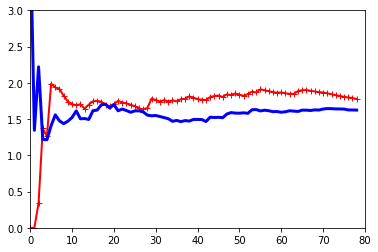

In [77]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)
#the error rate that goes up very high and reaches a plateau
#a validation curve that plateaus and ends very close to error curve
#is a sign of underfitting

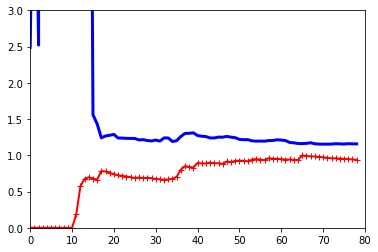

In [78]:
poly_reg = Pipeline([("poly_features",PolynomialFeatures(degree=10,include_bias=False)),("lin_reg",LinearRegression()),])
plot_learning_curves(poly_reg,X,y)
#error in training data is much lower
#there is a gap in the curves
#it means it is significantly better on the training data than the validation data
#overfitting

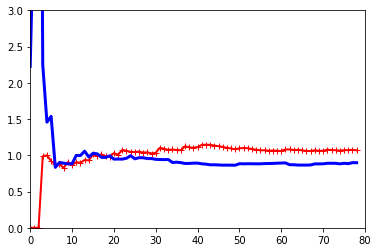

In [72]:
poly_reg = Pipeline([("poly_features",PolynomialFeatures(degree=2,include_bias=False)),("lin_reg",LinearRegression()),])
plot_learning_curves(poly_reg,X,y)